# Pérez Angeles Adrián

In [2]:
from numpy import *
from math import *
from sympy import *
from pylab import *
import matplotlib.pyplot as plt

def simpson(f,a,b,N):
    h=(b-a)/N
    s=0.0
    x=a+h
    for i in range(1, N, 2):
        s+=4*f(x)
        x+=2*h
    x=a+ 2*h
    for i in range(2, N, 2):
        s+=2*f(x)
        x+=2*h
    return (h/3)*((f(a)+f(b))+s)

1. Difracción de una Onda plana
Sea λ una onda plana que es bloqueada por un objeto con un borde, La onda sera difractada por el borde y la intensidad resultante en la posición (x, z) marcada por el punto esta dada por la teoría de difracción de campo cercano
$$I= \frac{I_{0}}{8}([2C(u)+1]^{2}+[2S(u)+1]^{2})$$
Donde $I_{0} $ es la intensidad de la función de onda antes de la difracción, mientras que
$$u=x\sqrt{\frac{2}{\lambda z}}$$ $$C(u)=\int_{0}^{u}cos(\frac{1}{2} \pi t^{2}dt)$$  $$S(u)=\int_{0}^{u}sin(\frac{1}{2} \pi t^{2}dt)$$
(i) Escribe un programa que calcule $I/I_{0}$

(ii) Gráfica la intensidad resultante $I$ para 3 distintas $I_{0}$, en un intervalo $x = [−5, 5]$
metros; supón el caso de una onda de sonido $(λ = 1$, y $z = 3m)$. Calcula las integrales
con el método de Simpson.

(iii) Realiza un análisis del resultado de tu gráfica.

El valor de la intensidad es 2.4556237009086073 a I0=1, a I0=2 I= 4.9112474018172145 y a I0=0.25 I= 0.6139059252271518


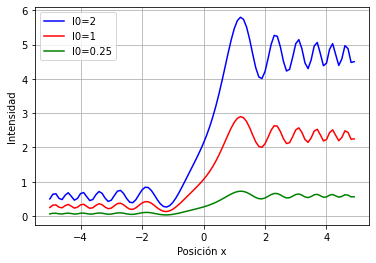

In [44]:
# i) con este programa se calcula I/I_{0} a partir de la función, solo es necesario meter los valores de lambda, z y el intervalo de x
def I_Io(x0, x, z, lamb):
    u=lambda x: x*sqrt(2/(lamb*z))
    c=lambda t: cos(0.5*pi*t**2)
    s= lambda t: sin(0.5*pi*t**2)
    C=simpson(c,x0,x,100)
    S=simpson(s,x0,x,100)
    return (1/8)*((2*C+1)**2+(2*S+1)**2)
print("El valor de la intensidad es %s a I0=1, a I0=2 I= %s y a I0=0.25 I= %s"%(I_Io(-5,5,3,1), 2*I_Io(-5,5,3,1), 0.25*I_Io(-5,5,3,1)))
t= arange (-5, 5 ,0.1)
plot( t, 2*I_Io(-5 ,t, 3, 1), 'b-', label="I0=2")
plot(t, I_Io(-5,t,3,1), 'r-', label='I0=1')
plot(t, 0.25*I_Io(-5,t,3,1), 'g-', label='I0=0.25')
xlabel("Posición x")
ylabel("Intensidad")
legend()
grid(True)
show()


Partiendo de la posición $x=0$, se visualiza que, dependiendo de la intensidad antes de la difracción $I_{0}$ influye en la intensidad $I$ tanto para el valor en $x=0$ como para la velocidad de crecimiento o decrecimiento de la intensidad, por otra parte, se observa que del lado izquierdo ($x<0$) la grafica decrece hasta el intervalo de la intensidad entre $I\in [0,1]$ que es la parte donde se encuentra el borde, se observa que llega hasta un minimo y de ahi comienza a fluctuar y acercarse hasta mostrar una intensidad practicamente igual para posiciones $x<<0$.
A su vez, para la posición pasando el borde ($x>0$) se observa que la intensidad tiene un maximo entre las $x\in [1,2]$ de ahi, conforme la posición de x aumenta la variación de la intensidad comienza a atenuarse, acercandose cada vez mas los maximos locales con los minimos locales, mostrando asi que conforme aumenta la posición, la intensidad de la onda ira llegando a un valor fijo en el intervalo $I\in [4,5]$ para $x>>0$

Periodo de un péndulo
El periodo de un péndulo simple de longitud $L$ es
$$\tau = 4h(\theta_{0})\sqrt{\frac{L}{g}}$$
Donde $g$ es el valor de la gravedad, $\theta_{0}$ representa la amplitud angular y
$$h(\theta_{0})=\int_{0}^{\frac{\pi}{2}} \frac{d \theta}{\sqrt{1-sin^{2}(\frac{\theta_{0}}{2})sin^{2}(\theta)}}$$

(i) Calcula el periodo de oscilación para diferentes ángulos $\theta_{0} = π/12, π/6, π/4.$

(ii) Gráfica $\theta_{0}$ vs $\tau$ . Asegúrate que la gráfica tenga 200 puntos, y que los valores de $\theta_{0}$
estén en el intervalo $[0, π/4]$.

(iii) Comenta con tus propias palabras los resultados de la gráfica.

El periodo a pi/12 es:  2.014693929298295 

El periodo a pi/6 es:  2.0409898895191287

 El periodo a pi/4 es:  2.0862558726143683


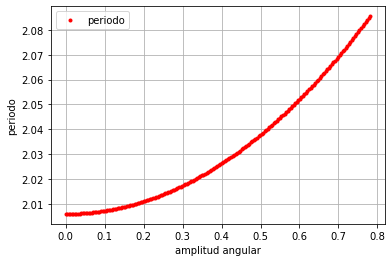

In [38]:
def periodo(x,t,l,g):
    pen=lambda w: 1/(sqrt(1-(sin(t/2)**2) *(sin(w)**2)))
    th=simpson(pen, 0, x, 1000)
    return 4*th*sqrt(l/g)
print("El periodo a pi/12 es: ",periodo(pi/2, pi/12, 1, 9.81), "\n")
print("El periodo a pi/6 es: ", periodo(pi/2, pi/6, 1, 9.81))
print("\n El periodo a pi/4 es: ", periodo(pi/2, pi/4, 1, 9.81))
w=arange(0,pi/4,pi/800)  #pi/4/200= pi/800 que es la división que debe tener cada punto para graficar 200 puntos en el intervalo
plot(w,periodo(pi/2, w, 1, 9.81), 'r.', label="periodo")
xlabel('amplitud angular')
ylabel('periodo')
legend()
grid(True)
show()

A partir de la grafica se visualiza que conforme aumenta la amplitud angular $\theta_{0}$ el periodo tambien aumenta aunque no de manera lineal, pues mientras mas cercana sea la amplitud angular de cero se observa que la velocidad de crecimiento es menor a cuando la amplitud se encuentra en un intervalo $\theta_{0} \in [0.5, \pi/4]$